Covid-19 Deaths
==

Other graphs concentrate on infection rates. Why not infection rates? - too 'noisy' - who is tested, there's no testing for asymtomatic. Real rates might be much higher.

Most nations have formal death notices, and reasons for. 

Work done in a Jupyter notepad showing the working. If you want to skip to the graphs click here:


[Blah](#blah)

[Rate](#rate)

[Tenth](#tenth)


In [6]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", rc={"lines.linewidth": 3})
sns.set_palette("bright")

In [7]:
def plot_it(x_axis_title, y_axis_title,data):
  plt.figure(figsize=(16,10))
  g = sns.lineplot(x=x_axis_title, y=y_axis_title,
             hue="Country/Region",
             err_style=None,
             data=data)
  g.set_yscale("log")
       

Let's load the data from John Hopkins University

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")


We can now transform the data so that each row each row contains the country, date of reading, deaths. we remove deaths in cruise ships and any rows where deaths are fewer than 10.

In [9]:
a = df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], 
        var_name="date", 
        value_name="deaths-per-province")
a = a.loc[a["Country/Region"] != "Cruise Ship"]

a['date'] = a['date'].astype('datetime64[ns]')
a['co-date'] = a['Country/Region'] + "-" + a['date'].astype('str')
a = a.loc[a["deaths-per-province"]>9]

#a['deaths'] = a.groupby("co-date")["deaths-per-province"].transform('sum')
a = a.join(a.groupby('co-date')['deaths-per-province'].sum(), on='co-date', rsuffix='-combined')
a.rename(columns={'deaths-per-province-combined': 'Deaths'}, inplace=True)

a.drop_duplicates(subset = "co-date", keep = 'first', inplace = True)
a = a.loc[a["Deaths"]>10]
a.tail(5)

,Province/State,Country/Region,Lat,Long,date,deaths-per-province,co-date,Deaths
24005,Hubei,China,30.9756,112.2707,2020-03-15,3085,China-2020-03-15,3120
24006,NaN,Iran,32.0000,53.0000,2020-03-15,724,Iran-2020-03-15,724
24007,NaN,"Korea, South",36.0000,128.0000,2020-03-15,75,"Korea, South-2020-03-15",75
24008,France,France,46.2276,2.2137,2020-03-15,91,France-2020-03-15,91
24255,United Kingdom,United Kingdom,55.3781,-3.4360,2020-03-15,21,United Kingdom-2020-03-15,21


<a id='blah'></a>

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


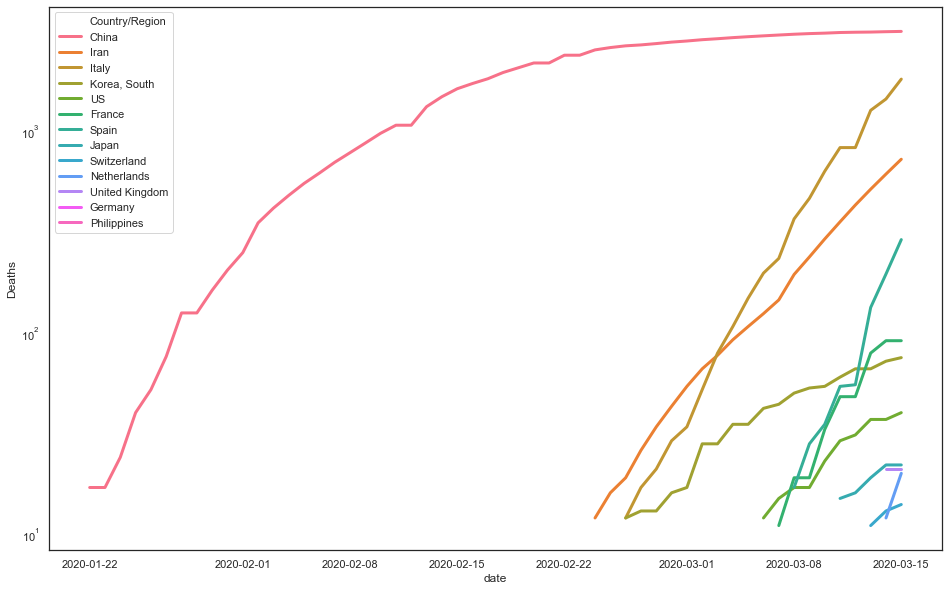

In [11]:
plot_it("date","Deaths",a)

In [12]:
def get_first_death_date (country):
  x = a[a['Country/Region'] == country]
  return x.sort_values(by='date', inplace=False).iloc[0,4]
  
a['first_death_date'] = a['Country/Region'].apply(get_first_death_date)
a['Days Since Tenth Death'] = a['date'] - a['first_death_date']
a['Days Since Tenth Death']= a['Days Since Tenth Death'].astype(int) / 86400000000000

<a id='tenth'></a>
Number of Deaths days after the tenth reported death
--

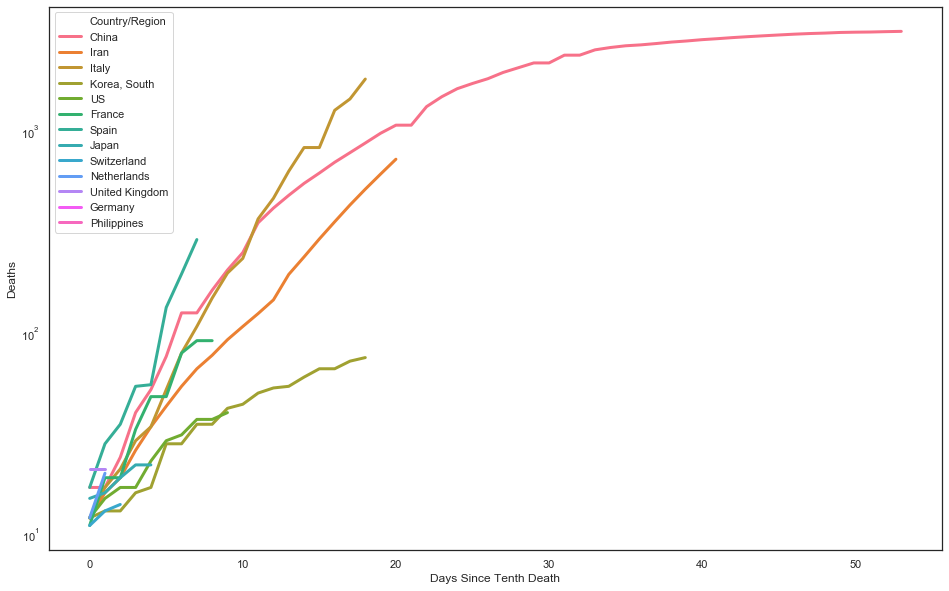

In [13]:
plot_it("Days Since Tenth Death", "Deaths", a)

If China is a benchmark then countries below are better, above are worse.

Death Rate Per Population
==

Absolute numbers are interesting, but let's look at per population.Let's read population data and 

In [14]:
demographics = pd.read_csv("data/API_SP.POP.TOTL_DS2_en_csv_v2_866861.csv", skiprows=4)
demographics.rename(columns={'Country Name': 'Country/Region'}, inplace=True)
a = pd.merge(a, demographics, on='Country/Region')
a["Deaths Per Million Population"] = a["Deaths"]/(a["2018"]/1000000)
a.tail(5)

,Province/State,Country/Region,Lat,Long,date,deaths-per-province,co-date,Deaths,first_death_date,Days Since Tenth Death,...,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64,Deaths Per Million Population
99,NaN,Netherlands,52.1326,5.2913,2020-03-15,20,Netherlands-2020-03-15,20,2020-03-14,1.0,...,16754962.0,16804432.0,16865008.0,16939923.0,17030314.0,17131296.0,17231017.0,NaN,NaN,1.160698
100,United Kingdom,United Kingdom,55.3781,-3.4360,2020-03-14,21,United Kingdom-2020-03-14,21,2020-03-14,0.0,...,63700300.0,64128226.0,64613160.0,65128861.0,65595565.0,66058859.0,66488991.0,NaN,NaN,0.315842
101,United Kingdom,United Kingdom,55.3781,-3.4360,2020-03-15,21,United Kingdom-2020-03-15,21,2020-03-14,1.0,...,63700300.0,64128226.0,64613160.0,65128861.0,65595565.0,66058859.0,66488991.0,NaN,NaN,0.315842
102,NaN,Germany,51.0000,9.0000,2020-03-15,11,Germany-2020-03-15,11,2020-03-15,0.0,...,80425823.0,80645605.0,80982500.0,81686611.0,82348669.0,82657002.0,82927922.0,NaN,NaN,0.132645
103,NaN,Philippines,13.0000,122.0000,2020-03-15,11,Philippines-2020-03-15,11,2020-03-15,0.0,...,97212638.0,98871552.0,100513138.0,102113212.0,103663927.0,105173264.0,106651922.0,NaN,NaN,0.103139


<a id='rate'></a>
Death Rate
--

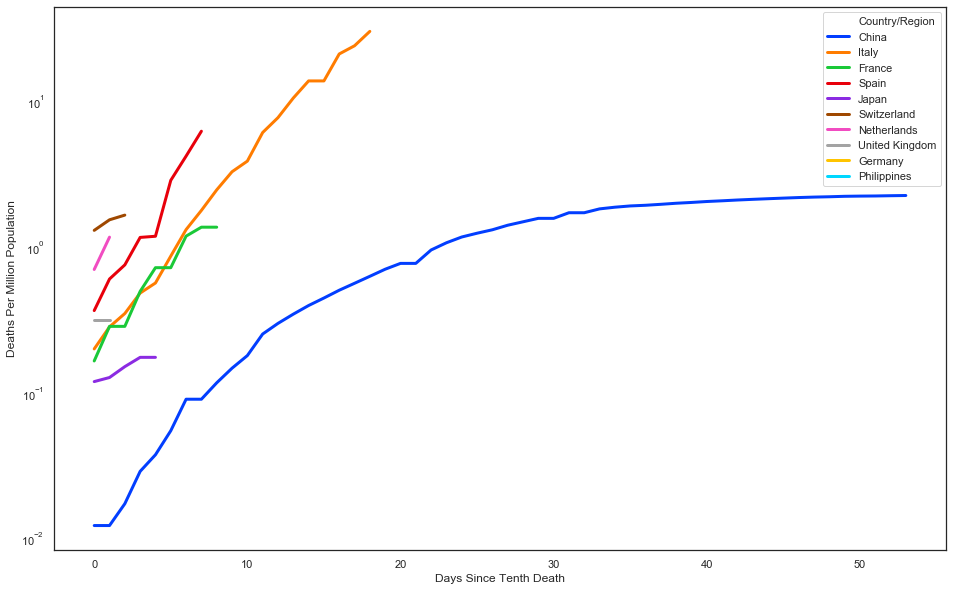

In [15]:
plot_it("Days Since Tenth Death", "Deaths Per Million Population", a)

This looks like xyz